**Training of Neural Networks on Titanic Dataset**

#**Step-1: Importing necessary libraries**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


#**Step-2: Load and preprocess the titanic dataset**

In [6]:
# Load the dataset

data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Drop unnecessary columns
data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Handle missing values
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Convert categorical features to numerical
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])
data['Embarked'] = LabelEncoder().fit_transform(data['Embarked'])

# Split the data into features and target
X = data.drop(columns=['Survived'])
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#**Step-3: Build the Neural Network model**

In [7]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # First hidden layer with 64 neurons and ReLU activation
    Dense(32, activation='relu'),                             # Second hidden layer with 32 neurons and ReLU activation
    Dense(1, activation='sigmoid')                            # Output layer with 1 neuron and sigmoid activation for binary classification
])


#**Step-4: Compile the model**

In [8]:
model.compile(optimizer='adam',               # Use the Adam optimizer
              loss='binary_crossentropy',     # Use binary crossentropy as the loss function
              metrics=['accuracy'])           # Track accuracy during training


#**Step-5: Define EarlyStopping Function**

**Callback functions, particularly the `EarlyStopping` callback, are vital tools in training neural networks. They monitor the model's performance on a validation set during training and can automatically stop the training process if the model's performance stops improving, which helps in preventing overfitting. The `EarlyStopping` callback is especially useful as it allows specifying a patience parameter, which is the number of epochs to wait for an improvement before halting the training. By stopping early, it not only saves computational resources but also helps in maintaining the model's ability to generalize well to new, unseen data.**

In [9]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


#**Step-6: Train the model with EarlyStopping**

In [10]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100
18/18 [==============================] - 6s 59ms/step - loss: 0.6518 - accuracy: 0.6854 - val_loss: 0.5827 - val_accuracy: 0.8112
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5597 - accuracy: 0.7909 - val_loss: 0.4934 - val_accuracy: 0.8252
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 0.4950 - accuracy: 0.7996 - val_loss: 0.4321 - val_accuracy: 0.8182
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 0.4570 - accuracy: 0.8049 - val_loss: 0.4054 - val_accuracy: 0.8322
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 0.4400 - accuracy: 0.8137 - val_loss: 0.3968 - val_accuracy: 0.8322
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 0.4288 - accuracy: 0.8172 - val_loss: 0.3950 - val_accuracy: 0.8182
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 0.4217 - accuracy: 0.8172 - val_loss: 0.3929 - val_accuracy: 0.8252
Epoch 8/100


#**Step-7: Evaluate the model**

In [11]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')


6/6 [==============================] - 0s 43ms/step - loss: 0.4108 - accuracy: 0.8156
Test accuracy: 0.8156424760818481


#**Plot training and validation Loss**

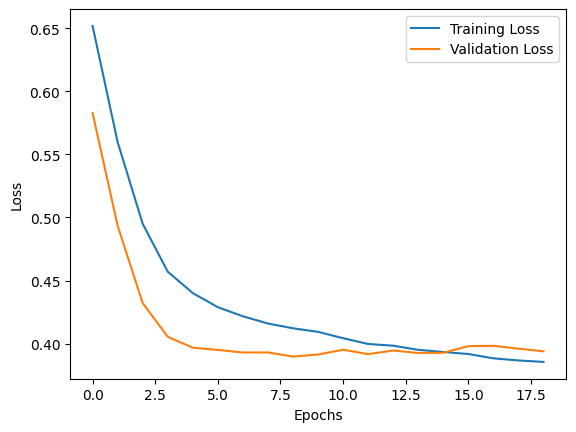

In [12]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Complete code**

Epoch 1/100
18/18 [==============================] - 2s 46ms/step - loss: 0.6754 - accuracy: 0.5659 - val_loss: 0.5944 - val_accuracy: 0.7972
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 0.5719 - accuracy: 0.8032 - val_loss: 0.5086 - val_accuracy: 0.8531
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5093 - accuracy: 0.8102 - val_loss: 0.4518 - val_accuracy: 0.8252
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 0.4692 - accuracy: 0.8102 - val_loss: 0.4148 - val_accuracy: 0.8322
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 0.4474 - accuracy: 0.8137 - val_loss: 0.3947 - val_accuracy: 0.8322
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 0.4333 - accuracy: 0.8155 - val_loss: 0.3895 - val_accuracy: 0.8322
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 0.4241 - accuracy: 0.8225 - val_loss: 0.3856 - val_accuracy: 0.8252
Epoch 8/100


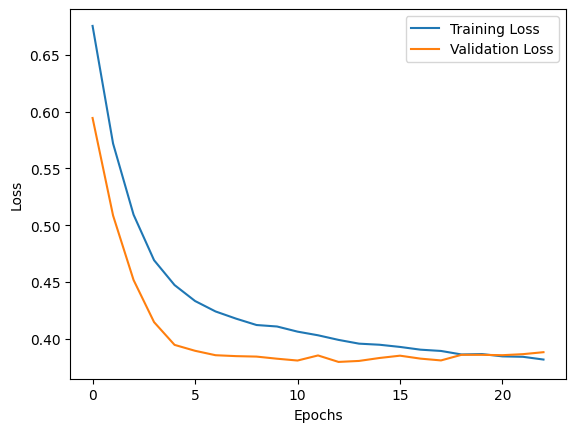

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the dataset

data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Drop unnecessary columns
data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Handle missing values
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Convert categorical features to numerical
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])
data['Embarked'] = LabelEncoder().fit_transform(data['Embarked'])

# Split the data into features and target
X = data.drop(columns=['Survived'])
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # First hidden layer with 64 neurons and ReLU activation
    Dense(32, activation='relu'),                             # Second hidden layer with 32 neurons and ReLU activation
    Dense(1, activation='sigmoid')                            # Output layer with 1 neuron and sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam',               # Use the Adam optimizer
              loss='binary_crossentropy',     # Use binary crossentropy as the loss function
              metrics=['accuracy'])           # Track accuracy during training

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with EarlyStopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
